<a href="https://colab.research.google.com/github/TheoTavora/PadraoDeProjetos/blob/main/Regress%C3%A3oLinearr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar bibliotecas

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

Download do dataset

Carregar o dataset para um Dataframe

In [6]:
#cria um dataset chamado 'df' que receberá os dados do csv
df = pd.read_excel("ARQUIVOTESTE.xlsx")
#exibe a estrutura o dataframe
print(df.head())

   Casa  Área (m²)  Preço (R$)  Quarto  Banheiro  Idade (anos) Localização  \
0     1        100      500000       3         2            10      Centro   
1     2        120      600000       2         1             5    Zona Sul   
2     3        150      800000       4         3            20  Zona Norte   
3     4        180     1000000       5         4            30      Centro   
4     5        220     1200000       4         2            15  Zona Oeste   

    Condição  
0        Boa  
1       Nova  
2  Reformada  
3      Ótima  
4        Boa  


Resumo

In [7]:
print(df.describe())

           Casa   Área (m²)    Preço (R$)     Quarto   Banheiro  Idade (anos)
count  50.00000   50.000000  5.000000e+01  50.000000  50.000000     50.000000
mean   25.50000  305.720000  2.020400e+06   4.620000   2.860000     17.520000
std    14.57738  174.604514  1.209275e+06   1.323107   1.030356      8.119616
min     1.00000   85.000000  5.000000e+05   2.000000   1.000000      4.000000
25%    13.25000  146.250000  8.475000e+05   4.000000   2.000000     10.250000
50%    25.50000  270.000000  1.895000e+06   5.000000   3.000000     16.500000
75%    37.75000  480.000000  3.175000e+06   6.000000   4.000000     22.750000
max    50.00000  570.000000  3.800000e+06   7.000000   5.000000     40.000000


Selecionar features do motor co2

In [8]:
area = df[['Área (m²)']]
preco = df[['Preço (R$)']]
print(area.head())
print(preco.head)

   Área (m²)
0        100
1        120
2        150
3        180
4        220
<bound method NDFrame.head of     Preço (R$)
0       500000
1       600000
2       800000
3      1000000
4      1200000
5      2500000
6      2700000
7      2900000
8      3100000
9      3300000
10      500000
11      630000
12      820000
13     1000000
14     1200000
15     2700000
16     2900000
17     3100000
18     3300000
19     3500000
20      550000
21      680000
22      870000
23     1070000
24     1270000
25     2800000
26     3000000
27     3200000
28     3400000
29     3600000
30      520000
31      650000
32      840000
33     1040000
34     1240000
35     2900000
36     3100000
37     3300000
38     3500000
39     3700000
40      570000
41      700000
42      890000
43     1090000
44     1290000
45     3000000
46     3200000
47     3400000
48     3600000
49     3800000>


Dividir o dataset em teste e treino

In [ ]:
motores_treino, motores_test, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


Exibir a correlação entre features do dataset de treinamento

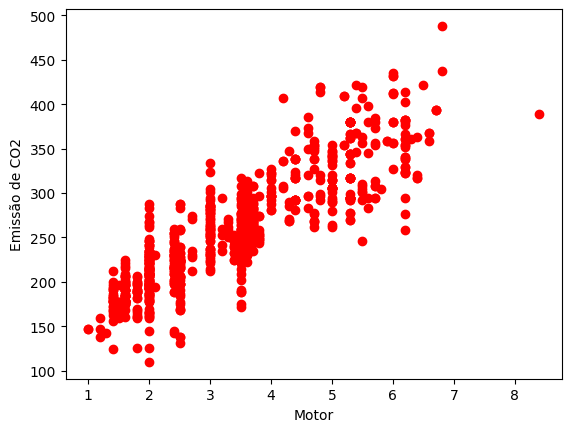

In [ ]:
plt.scatter(motores_treino, co2_treino, color='red')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()

Treinar modelo de regressão linear

In [ ]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo = linear_model.LinearRegression()

# TREINAR MODELO COM DATASET DE TREINO
# PARA ENCONTRAR VALOR DE A E B (Y = A + B.X)
modelo.fit(motores_treino, co2_treino)

LinearRegression()

Exibir coeficientes (A e B)

In [ ]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


Exibir reta de regressão no dataset de treino

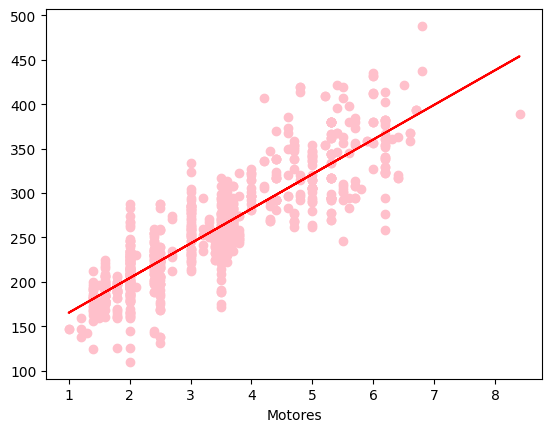

In [ ]:
plt.scatter(motores_treino, co2_treino, color='pink')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.xlabel("Emissão de CO2")
plt.xlabel("Motores")
plt.show()

Executar o modelo no dataset de teste

In [ ]:
predicoesCo2 = modelo.predict(motores_test)

Exibir reta de regressão no dataset de teste

In [ ]:
plt.scatter(motores_test, co2_teste, color='pink')
plt.plot(motores_test, modelo.coef_[0][0]*motores_test + modelo.intercept_[0], '-r')
plt.xlabel("Emissão de CO2")
plt.xlabel("Motores")
plt.show()

NameError: name 'plt' is not defined


Metricas
---



In [ ]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )

NameError: name 'np' is not defined